In [16]:
import pandas as pd
import seaborn as sns
from pathlib import Path
# import numpy as np
# import os
# import sys

In [17]:
def get_sheets(start):
    data = pd.DataFrame()
    year = start
    exists = True
    
    while exists:
        filename = Path("raw_data/teams-" + str(year) + ".csv")

#         if year == 2020:
#             year += 1
        if not filename.exists():
            exists = False
        else:
            new_data = pd.read_csv(filename)
            data = pd.concat([data, new_data])
            year += 1

    return data

In [30]:
df = get_sheets(2008)
df.rename(columns = {"penalityMinutesFor": "penaltyMinutesFor", "penalityMinutesAgainst": "penaltyMinutesAgainst"},
         inplace=True)
df.drop(["name", "team.1"], axis=1, inplace=True)
df.head()

,team,season,position,situation,games_played,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
0,MIN,2008,Team Level,other,82,0.48,0.49,0.49,11901.0,143.97,...,285.00,218.0,218.00,7.0,3.09,2.24,2.22,21.35,21.35,20.46
1,MIN,2008,Team Level,all,82,0.48,0.48,0.48,299195.0,2210.01,...,4490.31,3467.0,3459.72,257.0,36.30,27.99,29.58,204.64,204.38,200.25
2,MIN,2008,Team Level,5on5,82,0.46,0.47,0.47,230258.0,1602.93,...,3367.31,2575.0,2567.72,221.0,23.18,17.52,18.56,134.99,134.73,133.06
3,MIN,2008,Team Level,4on5,82,0.13,0.12,0.14,28293.0,65.18,...,735.00,579.0,579.00,1.0,9.34,7.21,7.36,43.14,43.14,41.59
4,MIN,2008,Team Level,5on4,82,0.88,0.88,0.86,28743.0,397.93,...,103.00,95.0,95.00,28.0,0.69,1.02,1.43,5.15,5.15,5.14


In [31]:
df.columns

Index(['team', 'season', 'position', 'situation', 'games_played',
       'xGoalsPercentage', 'corsiPercentage', 'fenwickPercentage', 'iceTime',
       'xOnGoalFor',
       ...
       'scoreAdjustedShotsAttemptsAgainst', 'unblockedShotAttemptsAgainst',
       'scoreAdjustedUnblockedShotAttemptsAgainst', 'dZoneGiveawaysAgainst',
       'xGoalsFromxReboundsOfShotsAgainst',
       'xGoalsFromActualReboundsOfShotsAgainst', 'reboundxGoalsAgainst',
       'totalShotCreditAgainst', 'scoreAdjustedTotalShotCreditAgainst',
       'scoreFlurryAdjustedTotalShotCreditAgainst'],
      dtype='object', length=105)

<AxesSubplot:>

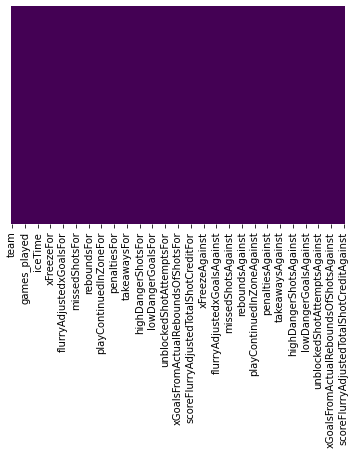

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #checking where there are nulls

In [33]:
df.isnull().count()

team                                         1970
season                                       1970
position                                     1970
situation                                    1970
games_played                                 1970
                                             ... 
xGoalsFromActualReboundsOfShotsAgainst       1970
reboundxGoalsAgainst                         1970
totalShotCreditAgainst                       1970
scoreAdjustedTotalShotCreditAgainst          1970
scoreFlurryAdjustedTotalShotCreditAgainst    1970
Length: 105, dtype: int64

In [37]:
df.to_excel("cleaned_moneypuck.xlsx", index=False)